## Karhunen-Loeve

In [1]:
import numpy as np
from math import sqrt
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

from scipy.optimize import fsolve

from tqdm import tqdm


#### 1)

Σχολια:

Για την εύρεση των eigenvalues και eigenfunctions έπρεπε να βρούμε μια αριθμητική λύση για τους εξής τύπους :



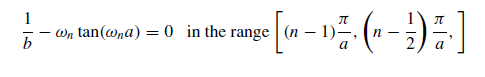

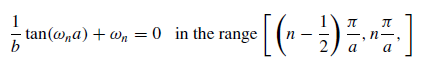

Για τον λόγο αυτό κάνουμε χρήση του scipy.optimize.fsolve https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.fsolve.html , το οποίο μας επιστρέφει τις ρίζες μιας μη γραμμικής εξίσωσης ξεκινώντας από μια αριθμητική τιμή που ορίζουμε.

In [2]:
## Domain = [0,5]
##Domain' = Domain - T = [0,5] - 0+5/2 = [-2.5,2.5] = [-a,a]

a=2.5
x = np.linspace(-a, a, 100)

## Autocorrelation function = var * exp(-|t|/b) = exp(-|t|/2) :

var = 1
b = 2

In [3]:
def f_odd(x):
    return 1/b - x * np.tan(x*a)

def f_even(x):
    return np.tan(x*a)/b + x

def eigenvalue(x):
    return 2*b / (1 + (x**2)*(b**2))

def eigenfunction_odd(x1,x):
    c = 1 / sqrt(a + np.sin(2*x1*a) / (2*x1))
    return c*np.cos(x1*x)

def eigenfunction_even(x1,x):
    l = 1 / sqrt(a - np.sin(2*x1*a) / (2*x1))
    return l*np.sin(x1*x)

In [4]:
eigenvalues=[]
eigenfunctions=[]

num_of_eigenvalues=20

for i in range(1,num_of_eigenvalues+1):
    
    range_high_odd = (i-0.5)*np.pi/a
    range_low_odd = (i-1)*np.pi/a

    
    range_high_even = i*np.pi/a
    range_low_even = (i-0.5)*np.pi/a
    
    
    solution = float(fsolve(f_odd, range_high_odd-0.01))
    if( solution>=range_low_odd and solution<=range_high_odd):
        print("YES ",i)
        value = eigenvalue(solution)
        function = eigenfunction_odd(solution,x)
        eigenvalues.append(value)
        eigenfunctions.append(function)
    else:
        print("NO ",i)
        print(solution,"[",range_low_odd,",",range_high_odd,"]")
        
        
    solution = float(fsolve(f_even, range_low_even+0.01))
    if( solution>=range_low_even and solution<=range_high_even):
        print("YES ",i)
        value = eigenvalue(solution)
        function = eigenfunction_even(solution,x)
        eigenvalues.append(value)
        eigenfunctions.append(function)
    else:
        print("NO ",i)
        print(solution,"[",range_low_even,",",range_high_even,"]")
        

YES  1
YES  1
YES  2
YES  2
YES  3
YES  3
YES  4
YES  4
YES  5
YES  5
YES  6
YES  6
YES  7
YES  7
YES  8
YES  8
YES  9
YES  9
YES  10
YES  10
YES  11
YES  11
YES  12
YES  12
YES  13
YES  13
YES  14
YES  14
YES  15
YES  15
YES  16
YES  16
YES  17
YES  17
YES  18
YES  18
YES  19
YES  19
YES  20
YES  20


In [5]:
KL_Order=5

In [6]:
def Realizations(n_Realizations,KL_Order=KL_Order,eigenvalues=eigenvalues,eigenfunctions=eigenfunctions):
    realizations=[]
    for i in tqdm(range(n_Realizations),total=n_Realizations):
        xe = np.random.normal(size = KL_Order)
        Sum=[]

        for k in range(KL_Order):
            Sum.append(sqrt(eigenvalues[k])*eigenfunctions[k]*xe[k])
        Sum=np.sum(Sum,axis=0)

        realizations.append(Sum)
    
    return realizations

In [7]:
realiz_50=Realizations(50)
realiz_500=Realizations(500)
realiz_1000=Realizations(1000)
realiz_5000=Realizations(5000)
realiz_10000=Realizations(10000)
realiz_50000=Realizations(50000)

100%|█████████████████████████████████████████████████████████████████████████| 50000/50000 [00:04<00:00, 11340.42it/s]


#### 2)

Όπως φαίνεται και παραπάνω κάνουμε χρήση των 5 πρώτων ορών στο KL-expansion, η επιλογή βασίστηκε στo ρυθμό συγκλισης των eigenvalues στο 0. 

Γνωρίζουμε από τον Ghanem and Spanos ότι η KL επέκταση είναι βέλτιστη ως προς το mean square όταν τα eigenvalues συγκλίνουν γρήγορα στο μηδέν.

Παρατηρούμε ότι μετά το 5ο eigenvalue οι τιμές είναι κάτω από το 0.125 που είναι δηλαδή το 5% της μέγιστης ιδιοτιμής και το κριτήριο που έχουμε θέσει

[2.5732786590973653, 1.0417849997527913, 0.4557392981019302, 0.2389405421455345, 0.14376360184938897, 0.09512424063307792, 0.06730714351893444, 0.05002316206812731, 0.03859015150905922, 0.03065109275959734, 0.024921133397590823, 0.02065374564100205, 0.01739201699274276, 0.01484396710792979, 0.012816116307834578, 0.011176228888970663, 0.009831485637791383, 0.008715205513929201, 0.007778499315892431, 0.006984870595555003, 0.006306633264564927, 0.005722480248183586, 0.005215799572986355, 0.004773486628883757, 0.004385092438529354, 0.004042203621466449, 0.003737984778814804, 0.003466836467442989, 0.003224136582746359, 0.0030060427030229576, 0.002809339518224812, 0.002631319968922324, 0.0024696918483004416, 0.002322503821993133, 0.0021880863872514606, 0.00206500442211066, 0.0019520187963656002, 0.001848055120291097, 0.0017521781537531266, 0.001663570734496157]


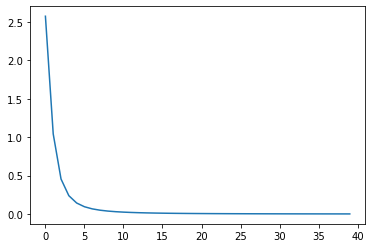

In [8]:
print(eigenvalues)
plt.plot(eigenvalues)

#### 3)

In [9]:
real_50=[10*x+10 for x in realiz_50]
real_500=[10*x+10 for x in realiz_500]
real_1000=[10*x+10 for x in realiz_1000]
real_5000=[10*x+10 for x in realiz_5000]
real_10000=[10*x+10 for x in realiz_10000]
real_50000=[10*x+10 for x in realiz_50000]

mu_50 = np.mean(real_50, axis = 0)
var_50 = np.var(real_50, axis = 0)

mu_500 = np.mean(real_500, axis = 0)
var_500 = np.var(real_500, axis = 0)

mu_1000 = np.mean(real_1000, axis = 0)
var_1000 = np.var(real_1000, axis = 0)

mu_5000 = np.mean(real_5000, axis = 0)
var_5000 = np.var(real_5000, axis = 0)

mu_10000 = np.mean(real_10000, axis = 0)
var_10000 = np.var(real_10000, axis = 0)

mu_50000 = np.mean(real_50000, axis = 0)
var_50000 = np.var(real_50000, axis = 0)

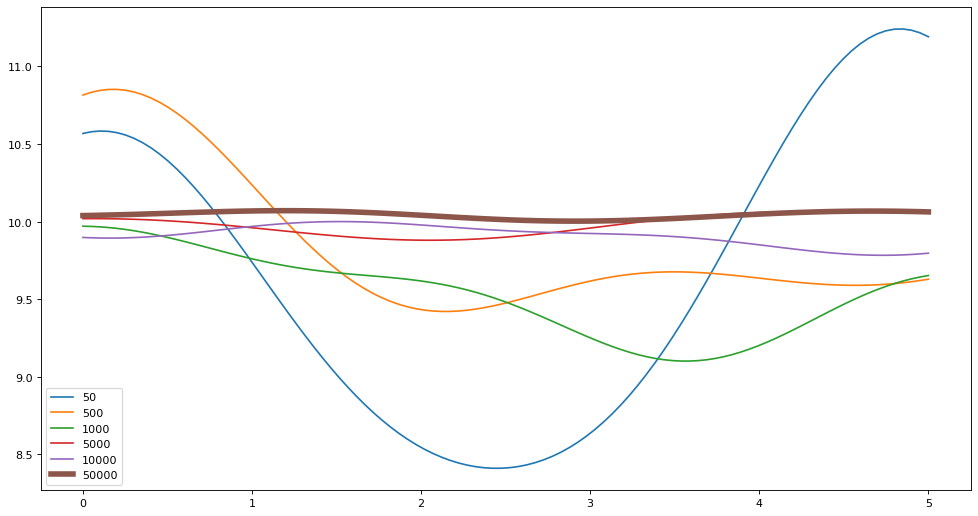

In [10]:
x_new=x+2.5

figure(figsize=(15, 8), dpi=80)
plt.plot(x_new, mu_50, label = "50")
plt.plot(x_new, mu_500, label = "500")
plt.plot(x_new, mu_1000, label = "1000")
plt.plot(x_new, mu_5000, label = "5000")
plt.plot(x_new, mu_10000, label = "10000")
plt.plot(x_new, mu_50000, label = "50000",linewidth=5)

plt.legend()

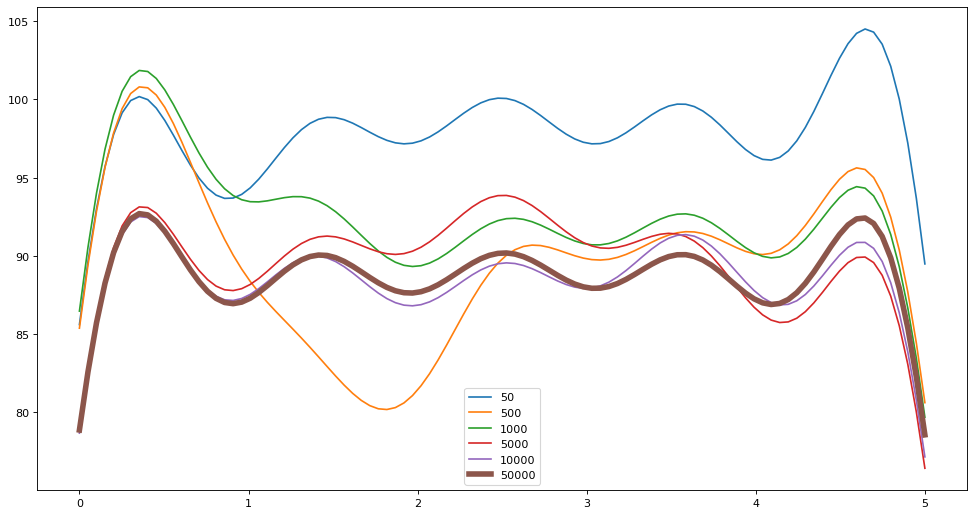

In [11]:
figure(figsize=(15, 8), dpi=80)
plt.plot(x_new, var_50, label = "50")
plt.plot(x_new, var_500, label = "500")
plt.plot(x_new, var_1000, label = "1000")
plt.plot(x_new, var_5000, label = "5000")
plt.plot(x_new, var_10000, label = "10000")
plt.plot(x_new, var_50000, label = "50000",linewidth=5)

plt.legend()

#### Σχόλια:
    
- Γνωρίζουμε από θεωρία ότι η E(x) θα έχει μέση τιμή 10 και διασπορά 100
- Πραγματοποιούμε αναπαράσταση αρκετών στο πλήθος realizations και βλέπουμε ότι η μέση τιμή συγκλίνει στο 10, δηλαδή στη θεωρητική τιμή
- Τέλος, βλέπουμε πως η διασπορά δεν έχει την ίδια ποιότητα σύγκλισης με την μέση τιμή αλλά παρατηρούμε ότι συγκλίνει ένα χαμηλότερο διάστημα [80,90] καθώς επίσης στα άκρα του χωρίου χειροτερεύει η εκτίμηση, το φαινόμενο της υποεκτίμησης οφείλεται στο γεγονός ότι λαμβάνουμε μόνο 5 όρους στο KL ανάπτυγμα. Το φαινόμενο χειρότερης εκτίμησης στα άκρα, οφείλεται στο φαινόμενο Gibbs που παρατηρείται στα ημιτονοειδή αθροίσματα, όπως είναι δηλαδή το variance στη συγκεκριμένη περίπτωση.